# Creating figure 4 of the paper 

In [1]:


# Import all things necessary
from scenario_class import Scenario
from plots_class import Plots
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import pandas as pd
import matplotlib.cm as cm
from scenariosweeper_class import ScenarioSweeper
import matplotlib.gridspec as gridspec
from matplotlib.ticker import FuncFormatter


# Sweeper 1 
######### SWEEP OVER CDR LEVELS AND CDR ASSUMPTIONS #########
end_year_values = [2080]
income_goal_values = [5000, 10000, 20000, 30000]
carbon_budget_values = [1150*0.95 - 2*35] #95% of the carbon budget is used to account for the fact that we have 95% population coverage in the model
gdp_assumption_values = ["constant_ratio"]
pop_growth_assumption_values = ["semi_log_model"]
tech_evolution_assumption_values = ["plausible"]
tech_hysteresis_assumption_values = ["on"]
steady_state_high_income_assumption_values = ["off"]
population_hysteresis_assumption_values = ["on"]
sigmoid_parameters = [0.05, 2060] # k, first param., is the steepness of the sigmoid (0 < k < 1) and t0, second param, is the year of the midpoint of the sigmoid function of the weighted
final_improvement_rate = [-0.05] # final global uniform carbon intensity improvement rate that countries transition to from green growth trend which is the best rate that is currently grasped by the fit more or less
run_until_2100 = ["on"] # this is a string and either (1) on or (2) off for details see the scenario_class.py file
cdr_assumption = ["on"] # this is a string and either (1) on or (2) off for details see the scenario_class.py file
cdr_level_2100 = [0,2,4,6,8,10,12,14,16,18,20] #  in gigatonnes of carbon dioxide removal (CDR) in 2100
sweeper1 = ScenarioSweeper(end_year_values,
                           income_goal_values,
                           carbon_budget_values,
                           gdp_assumption_values,
                           pop_growth_assumption_values,
                           tech_evolution_assumption_values,
                           tech_hysteresis_assumption_values,
                           steady_state_high_income_assumption_values,
                           sigmoid_parameters,
                           final_improvement_rate,
                           population_hysteresis_assumption_values,
                           run_until_2100,
                           cdr_assumption,
                           cdr_level_2100)



# Sweeper 2 
######### SWEEP OVER final improvement rate #########
end_year_values = [2080]
income_goal_values = [5000, 10000, 20000, 30000]
carbon_budget_values = [1150*0.95 - 2*35] #95% of the carbon budget is used to account for the fact that we have 95% population coverage in the model
gdp_assumption_values = ["constant_ratio"]
pop_growth_assumption_values = ["semi_log_model"]
tech_evolution_assumption_values = ["plausible"]
tech_hysteresis_assumption_values = ["on"]
steady_state_high_income_assumption_values = ["off"]
population_hysteresis_assumption_values = ["on"]
sigmoid_parameters = [0.05, 2060] # k, first param., is the steepness of the sigmoid (0 < k < 1) and t0, second param, is the year of the midpoint of the sigmoid function of the weighted
final_improvement_rate = [-0.02, -0.04, -0.06, -0.08, -0.1, -0.12, -0.14, -0.16] # final global uniform carbon intensity improvement rate that countries transition to from green growth trend which is the best rate that is currently grasped by the fit more or less
run_until_2100 = ["on"] # this is a string and either (1) on or (2) off for details see the scenario_class.py file
cdr_assumption = ["on"] # this is a string and either (1) on or (2) off for details see the scenario_class.py file
cdr_level_2100 = [5] #  in gigatons
sweeper2 = ScenarioSweeper(end_year_values,
                           income_goal_values,
                           carbon_budget_values,
                           gdp_assumption_values,
                           pop_growth_assumption_values,
                           tech_evolution_assumption_values,
                           tech_hysteresis_assumption_values,
                           steady_state_high_income_assumption_values,
                           sigmoid_parameters,
                           final_improvement_rate,
                           population_hysteresis_assumption_values,
                           run_until_2100,
                           cdr_assumption,
                           cdr_level_2100)


output_sweeper1 = sweeper1.run_scenarios() 
output_sweeper2 = sweeper2.run_scenarios()



this is the cumulative emissions  before cdr adjustment 932035520974.064
this is the cumulative emissions  after cdr adjustment 932035520974.064
this is the cumulative emissions  before cdr adjustment 932035520974.064
this is the cumulative emissions  after cdr adjustment 813035520974.064
this is the cumulative emissions  before cdr adjustment 932035520974.064
this is the cumulative emissions  after cdr adjustment 694035520974.064
this is the cumulative emissions  before cdr adjustment 932035520974.064
this is the cumulative emissions  after cdr adjustment 575035520974.064
this is the cumulative emissions  before cdr adjustment 932035520974.064
this is the cumulative emissions  after cdr adjustment 456035520974.06396
this is the cumulative emissions  before cdr adjustment 932035520974.064
this is the cumulative emissions  after cdr adjustment 337035520974.06396
this is the cumulative emissions  before cdr adjustment 932035520974.064
this is the cumulative emissions  after cdr adjustmen

In [2]:
relevant_output1 = output_sweeper1[0]
relevant_output2 = output_sweeper2[0]

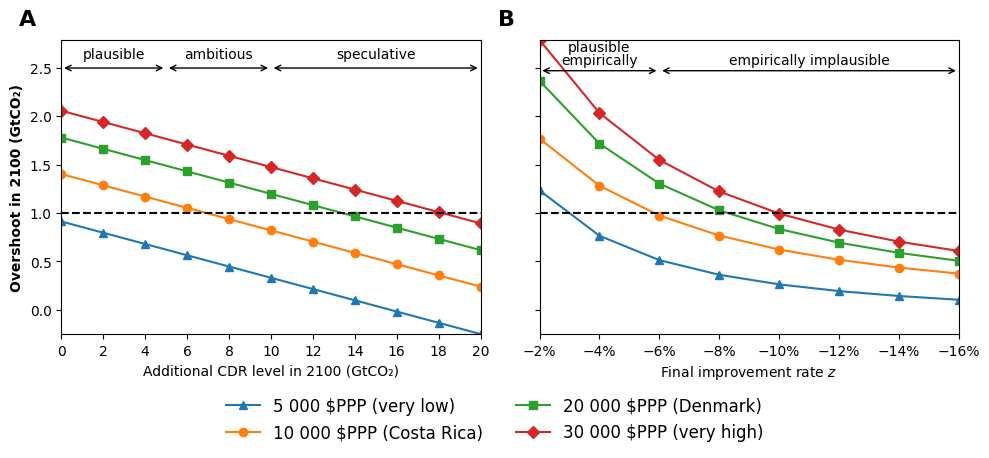

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

# ─── Helpers ──────────────────────────────────────────────────────────────────

def split_by_income(output):
    """Return two dicts: keys with income_goal ≤10k, and >10k."""
    low, high = {}, {}
    for key, val in output.items():
        inc = dict(key)["income_goal"]
        (low if inc <= 10000 else high)[key] = val
    return low, high

def prepare_xy(data, x_name):
    """Extract and sort (x, y) from data keyed by scenario_key tuple."""
    pairs = []
    for key, val in data.items():
        x = next(v for (k, v) in key if k == x_name)
        pairs.append((x, val))
    pairs.sort(key=lambda t: t[0])
    return zip(*pairs) if pairs else ([], [])

# ─── Data Extraction ─────────────────────────────────────────────────────────

# Assume you have:
#   relevant_output1 = output_sweeper1[0]
#   relevant_output2 = output_sweeper2[0]

cr1, dn1 = split_by_income(relevant_output1)
cr2, dn2 = split_by_income(relevant_output2)

def extract_series(group, income, x_name):
    subset = {k: v for k, v in group.items() if dict(k)["income_goal"] == income}
    return prepare_xy(subset, x_name)

# Panel A series (CDR level)
xr5,  yr5  = extract_series(cr1, 5000,  "cdr_level_2100")
xr10, yr10 = extract_series(cr1, 10000, "cdr_level_2100")
xd20, yd20 = extract_series(dn1, 20000, "cdr_level_2100")
xd30, yd30 = extract_series(dn1, 30000, "cdr_level_2100")

# Panel B series (final improvement rate)
xr5b,  yr5b  = extract_series(cr2, 5000,  "final_improvement_rate")
xr10b, yr10b = extract_series(cr2, 10000, "final_improvement_rate")
xd20b, yd20b = extract_series(dn2, 20000, "final_improvement_rate")
xd30b, yd30b = extract_series(dn2, 30000, "final_improvement_rate")

# ─── Plotting ─────────────────────────────────────────────────────────────────

fig, (axA, axB) = plt.subplots(1, 2, figsize=(10, 4), sharey=True)

# --- Panel A: Overshoot vs CDR level ---
l5  = axA.plot(xr5,  yr5,  marker='^', label="5 000 $PPP (very low)")[0]
l10 = axA.plot(xr10, yr10, marker='o', label="10 000 $PPP (Costa Rica)")[0]
l20 = axA.plot(xd20, yd20, marker='s', label="20 000 $PPP (Denmark)")[0]
l30 = axA.plot(xd30, yd30, marker='D', label="30 000 $PPP (very high)")[0]

axA.axhline(1, linestyle='--', color='black')
axA.margins(x=0, y=0)
axA.set_xlabel("Additional CDR level in 2100 (GtCO₂)")
axA.set_ylabel("Overshoot in 2100 (GtCO₂)", fontweight='bold')
axA.text(-0.1, 1.05, "A", transform=axA.transAxes,
         fontsize=16, fontweight='bold')

# Force x-ticks at [0,2,4…,20]
xticks = list(range(0, 21, 2))
axA.set_xticks(xticks)
axA.xaxis.set_major_formatter(mticker.FormatStrFormatter('%d'))

# Panel A arrows at 85% of y-span
ylimA = axA.get_ylim()
yA    = ylimA[1] * 0.85
xminA, xmaxA = axA.get_xlim()

# 0–5 plausible
e1 = min(5, xmaxA)
axA.annotate('', xy=(e1, yA+0.75), xytext=(xminA, yA+0.75),
             arrowprops=dict(arrowstyle='<->', lw=1))
axA.text((xminA + e1)/2, yA + 0.4*ylimA[1], "plausible",
         ha='center', va='bottom')

# 5–10 ambitious
s2, e2 = max(xminA, 5), min(xmaxA, 10)
if e2 > s2:
    axA.annotate('', xy=(e2, yA+0.75), xytext=(s2, yA+0.75),
                 arrowprops=dict(arrowstyle='<->', lw=1))
    axA.text((s2 + e2)/2, yA + 0.4*ylimA[1], "ambitious",
             ha='center', va='bottom')

# 10–xmax speculative
if xmaxA > 10:
    axA.annotate('', xy=(xmaxA, yA+0.75), xytext=(10, yA+0.75),
                 arrowprops=dict(arrowstyle='<->', lw=1))
    axA.text((10 + xmaxA)/2, yA + 0.4*ylimA[1], "speculative",
             ha='center', va='bottom')


# --- Panel B: Overshoot vs Final Improvement Rate ---
m5  = axB.plot(xr5b,  yr5b,  marker='^')[0]
m10 = axB.plot(xr10b, yr10b, marker='o')[0]
m20 = axB.plot(xd20b, yd20b, marker='s')[0]
m30 = axB.plot(xd30b, yd30b, marker='D')[0]
for line, lbl in zip([m5, m10, m20, m30],
                     ["5 000 $PPP (very low)", "10 000 $PPP (Costa Rica)",
                      "20 000 $PPP (Denmark)", "30 000 $PPP (very high)"]):
    line.set_label(lbl)

axB.axhline(1, linestyle='--', color='black')
axB.margins(x=0, y=0)
axB.invert_xaxis()
axB.set_xlabel(r"Final improvement rate $z$")
axB.text(-0.1, 1.05, "B", transform=axB.transAxes,
         fontsize=16, fontweight='bold')

# Percent formatter
axB.xaxis.set_major_formatter(mticker.PercentFormatter(xmax=1, decimals=0))

# Panel B arrows at 85% of y-span
ylimB    = axB.get_ylim()
yB_arrow = ylimB[1] * 0.85
x1, x2   = sorted(axB.get_xlim())
pl_start, pl_end = -0.06, -0.02

# empirically plausible
ps = max(x1, pl_start)
pe = min(x2, pl_end)
if pe > ps:
    axB.annotate('', xy=(pe, yB_arrow+0.1), xytext=(ps, yB_arrow+0.1),
                 arrowprops=dict(arrowstyle='<->', lw=1))
    mid = 0.5*(ps+pe)
    axB.text(mid, yB_arrow + 0.05*ylimB[1], "empirically", ha='center', va='bottom')
    axB.text(mid, yB_arrow + 0.096*ylimB[1], "plausible",    ha='center', va='bottom')

# empirically implausible
if ps > x1:
    axB.annotate('', xy=(x1, yB_arrow+0.1), xytext=(ps, yB_arrow+0.1),
                 arrowprops=dict(arrowstyle='<->', lw=1))
    axB.text((x1+ps)/2, yB_arrow + 0.05*ylimB[1],
             "empirically implausible", ha='center', va='bottom')


# ─── Shared Legend (2×2) ───────────────────────────────────────────────────
handles, labels = axA.get_legend_handles_labels()
fig.legend(
    handles, labels,
    loc='lower center',
    ncol=2,
    frameon=False,
    fontsize=12,
    bbox_to_anchor=(0.5, -0.15)
)

plt.subplots_adjust(bottom=0.25)
plt.tight_layout()
plt.savefig('fig4.png', dpi=300, bbox_inches='tight')
plt.show()

